**Pandas Exercises - With the NY Times Covid data**

Run the cell below to pull get the data from the nytimes github

In [1]:
!git clone https://github.com/nytimes/covid-19-data.git

**1. Import Pandas and Check your Version of Pandas**

In [2]:
import pandas as pd
pd.__version__

'1.0.3'

**2. Read the *us-counties.csv* data into a new Dataframe**

In [0]:
covid_data = pd.read_csv('/content/covid-19-data/us-counties.csv')


**3. Display the first 5 Rows**

In [4]:
covid_data.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


**4. Drop the 'fips' Column**

In [0]:
covid_data = covid_data.drop('fips', axis=1)

**5. Check dtypes of the data**

In [6]:
covid_data.dtypes

date      object
county    object
state     object
cases      int64
deaths     int64
dtype: object

**6. Change the 'date' column to Date dtype**

In [0]:
covid_data.date = pd.to_datetime(covid_data.date)

**7. Set the data index to 'date'**

In [0]:
covid_data = covid_data.set_index('date')

**8. Find how many weeks worth of data we have**

In [9]:
print('Weeks:', (covid_data.index.max() - covid_data.index.min()).days / 7)

Weeks: 15.285714285714286


**9. Create a seperate Dataframe representing only California and display the first 5 data entries**

In [10]:
CA_data = covid_data[covid_data['state'].str.contains("California")]
CA_data.head()

,county,state,cases,deaths
date,,,,
2020-01-25,Orange,California,1,0
2020-01-26,Los Angeles,California,1,0
2020-01-26,Orange,California,1,0
2020-01-27,Los Angeles,California,1,0
2020-01-27,Orange,California,1,0


**10. How many counties in California do we have data for?**

In [11]:
CA_data['county'].nunique()

55

**11. How many data entries do we have for each county?**

In [12]:
CA_data['county'].value_counts()

Orange             104
Los Angeles        103
Santa Clara         98
San Francisco       96
San Diego           88
Humboldt            78
Sacramento          77
Solano              74
Marin               72
Sonoma              72
Napa                72
Alameda             68
San Mateo           67
Placer              67
Contra Costa        66
Yolo                63
Fresno              62
Riverside           62
Santa Cruz          62
Madera              62
Shasta              60
San Joaquin         59
Ventura             59
Stanislaus          58
Tulare              57
San Benito          56
San Luis Obispo     55
Santa Barbara       54
San Bernardino      54
Nevada              53
Monterey            52
Kern                52
Mendocino           51
Amador              49
Imperial            49
Siskiyou            48
El Dorado           48
Butte               48
Yuba                48
Merced              45
Calaveras           45
Mono                45
Sutter              44
Inyo       

In [13]:
# Alternatively the count and totals can be done with collections Counter
from collections import Counter
count = Counter(CA_data['county'])
count

Counter({'Alameda': 68,
         'Alpine': 39,
         'Amador': 49,
         'Butte': 48,
         'Calaveras': 45,
         'Colusa': 42,
         'Contra Costa': 66,
         'Del Norte': 36,
         'El Dorado': 48,
         'Fresno': 62,
         'Glenn': 41,
         'Humboldt': 78,
         'Imperial': 49,
         'Inyo': 44,
         'Kern': 52,
         'Kings': 42,
         'Lake': 32,
         'Los Angeles': 103,
         'Madera': 62,
         'Marin': 72,
         'Mariposa': 10,
         'Mendocino': 51,
         'Merced': 45,
         'Mono': 45,
         'Monterey': 52,
         'Napa': 72,
         'Nevada': 53,
         'Orange': 104,
         'Placer': 67,
         'Plumas': 38,
         'Riverside': 62,
         'Sacramento': 77,
         'San Benito': 56,
         'San Bernardino': 54,
         'San Diego': 88,
         'San Francisco': 96,
         'San Joaquin': 59,
         'San Luis Obispo': 55,
         'San Mateo': 67,
         'Santa Barbara': 54,
       

**12. How many counties in California have experienced over 1000 cases?**

In [14]:
len(CA_data[CA_data['cases'] > 1000]['county'].value_counts())

11

In [15]:
# nunique will tell you how for each Column
CA_data[CA_data['cases'] > 1000].nunique()

county     11
state       1
cases     249
deaths    130
dtype: int64

**13. Which county has experienced the highest death toll?**

In [16]:
CA_data[CA_data['deaths'] > max(CA_data['deaths']) - 1]

,county,state,cases,deaths
date,,,,
2020-05-07,Los Angeles,California,29427,1418


**14. Slice the Data for that County Seperately into a new Dataframe**

In [0]:
la_ca_data = CA_data[CA_data['county'].str.contains('Los Angeles')]

**15. Create and populate new Columns for New Cases per Day and Deaths per day**

In [0]:
# Creating a New Column this way will Raise a SettingWithCopyWarning
pd.set_option('mode.chained_assignment',None)
# The Code above surpresses that warning

la_ca_data['cases_per_day'] = la_ca_data['cases'].diff(1).fillna(0)
la_ca_data['deaths_per_day'] = la_ca_data['deaths'].diff(1).fillna(0)

# This code turns the warning back on
# See the Pandas documentation here for more on SettingWithCopyWarning
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.set_option('mode.chained_assignment', 'warn')

**16. What date had the most cases for LA county?**

In [52]:
la_ca_data[la_ca_data['cases_per_day'] > max(la_ca_data['cases_per_day']) - 1]

,county,state,cases,deaths,cases_per_day,deaths_per_day
date,,,,,,
2020-05-05,Los Angeles,California,27815,1313,1598.0,57.0


**17. Inspect the data in the month of April for Los Angeles County**

In [40]:
april_la_ca_data = la_ca_data['2020-04-01':'2020-04-30']
april_la_ca_data

,county,state,cases,deaths,cases_per_day,deaths_per_day
date,,,,,,
2020-04-01,Los Angeles,California,3518,65,507.0,11.0
2020-04-02,Los Angeles,California,4045,78,527.0,13.0
2020-04-03,Los Angeles,California,4566,89,521.0,11.0
2020-04-04,Los Angeles,California,5277,117,711.0,28.0
2020-04-05,Los Angeles,California,5940,132,663.0,15.0
2020-04-06,Los Angeles,California,6360,147,420.0,15.0
2020-04-07,Los Angeles,California,6910,169,550.0,22.0
2020-04-08,Los Angeles,California,7530,198,620.0,29.0
2020-04-09,Los Angeles,California,7955,223,425.0,25.0


**18. Find the mean [cases per day] for April**

In [28]:
april_la_ca_data = la_ca_data['2020-04-01':'2020-04-30']
april_la_ca_data.describe()

,cases,deaths,cases_per_day,deaths_per_day
count,30.000000,30.000000,30.000000,30.000000
mean,12076.833333,493.366667,672.366667,35.233333
std,5903.846824,333.233943,347.910460,19.126950
min,3518.000000,65.000000,228.000000,11.000000
25%,7636.250000,204.250000,444.500000,19.000000
50%,10675.000000,428.500000,554.500000,29.000000
75%,17239.750000,780.000000,707.500000,51.250000
max,23182.000000,1111.000000,1509.000000,81.000000


**19. Plot cases per day for the month of April in Los Angeles county**

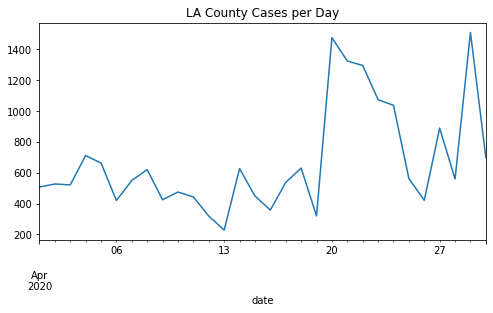

In [21]:
la_cases_plot = april_la_ca_data['cases_per_day'].plot(title='LA County Cases per Day')
fig = la_cases_plot.get_figure()
fig.set_size_inches(8,4)

**20. Plot Deaths per Day for the month of March**

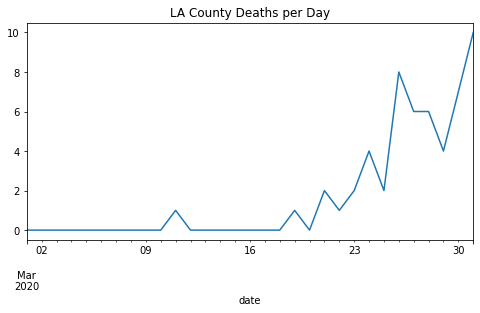

In [22]:
march_la_ca_data = la_ca_data['2020-03-01':'2020-03-31']
la_march_plot = march_la_ca_data['deaths_per_day'].plot(title='LA County Deaths per Day')
fig = la_march_plot.get_figure()
fig.set_size_inches(8,4)

**Armed with basics in Pandas - Answer your own questions about the data!  Happy exploring**

Don't hesitate to send me suggestions / a message / or make change requests.  There is more than one way to do everything here!